In [ ]:
#face detection
#landmark detection
#mask detection

In [1]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.models import load_model
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

plt.style.use('dark_background')

### Load Models


In [2]:
#face detection model
facenet = cv2.dnn.readNet('models/deploy.prototxt', 'models/res10_300x300_ssd_iter_140000.caffemodel')
model = load_model('models/mask_detector.model')

### Load Image

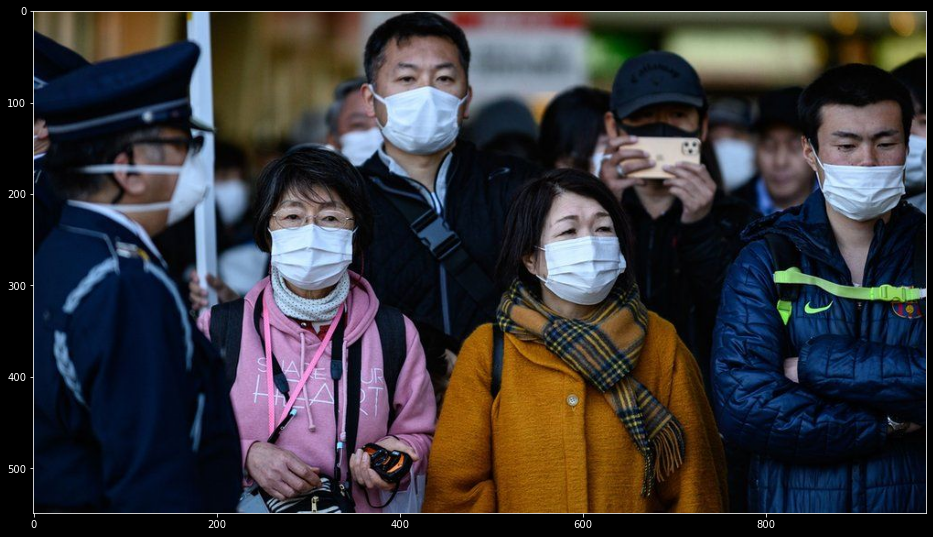

In [3]:
#BGB로 읽힌다
img = cv2.imread('imgs/03.jpg')
h, w = img.shape[:2]

plt.figure(figsize=(16,10))
#RGB로 바꾸어준다 
plt.imshow(img[:,:,::-1])

### Face Detection 전처리


In [4]:
#cv2.blobFromImage() : dnn 모듈이 사용하는 형태로 이미지를 변형 axsi 순서만 바뀐다
blob = cv2.dnn.blobFromImage(img, scalefactor=1., size=(300, 300), mean=(104., 177., 123.))
#face detection 모델
facenet.setInput(blob)
#face detection 결과가 dets에 저장이 된다 
dets = facenet.forward()


### Detect Faces

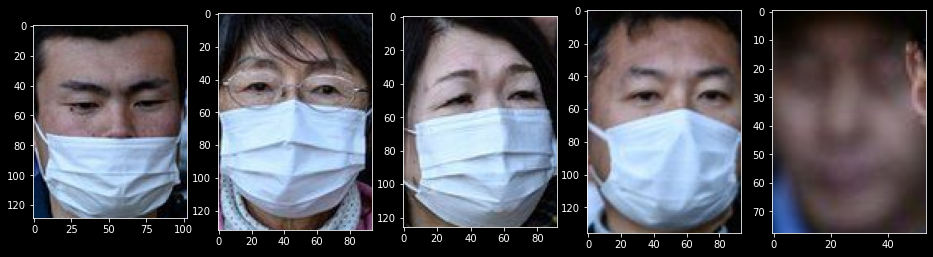

In [5]:
faces = []
#img에서 rectangle을 찍어 faces배열에 넣는다 
for i in range(dets.shape[2]):
    confidence = dets[0, 0, i, 2]
    #얼굴을 탐색한 결과가 0.5를 넘어야 한다 
    if confidence < 0.5:
        continue
    x1 = int(dets[0, 0, i, 3] * w)
    y1 = int(dets[0, 0, i, 4] * h)    
    x2 = int(dets[0, 0, i, 5] * w)    
    y2 = int(dets[0, 0, i, 6] * h)    
    
    face = img[y1:y2, x1:x2]
    faces.append(face)
    
plt.figure(figsize = (16,5))

for i,face in enumerate(faces):
    plt.subplot(1, len(faces), i+1)
    plt.imshow(face[:,:,::-1])


### Detect Masks from Faces

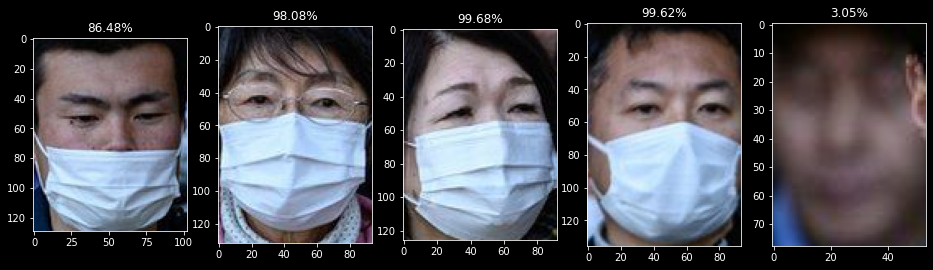

In [6]:
plt.figure(figsize=(16,5))

for i, face in enumerate(faces):
    #이미지를 줄여준다 
    face_input = cv2.resize(face, dsize=(224, 224))
    #이미지의 컬러시스템을 변경한다 (BGR -> RGB) 
    face_input = cv2.cvtColor(face_input, cv2.COLOR_BGR2RGB)
    #Mobilenet preprocessing (224,224,3)
    face_input = preprocess_input(face_input)
    #차원추가 (1, 223, 223, 3)
    face_input = np.expand_dims(face_input, axis = 0)
    
    mask, nomask = model.predict(face_input).squeeze()
    
    plt.subplot(1, len(faces), i+1)
    plt.imshow(face[:,:,::-1])
    plt.title('%.2f%%' % (mask * 100))